<a href="https://colab.research.google.com/github/katek973/SUHI2/blob/main/SUHI_KK_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [ ]:
# download dataset from excel file
data = pd.read_excel('CSP De-identified Data v3 2.14.22 Excel.xlsx')
data.head()

,record_id,redcap_event_name,new_patient,type_id,chw_name,inperson_connection,sw_date,referral_date,referral_month,referral_source,...,day_readmit,time_spent_1,time_spent_2,total_time_spent,contact_attempts,case_closed,closed_date,declined,anything_else,follow_up_chws_complete_later_complete
0,2,round_1_arm_1,0.0,1.0,3.0,NaN,2021-04-12,2021-04-12,2104.0,1.0,...,0.0,0.0,0.0,0.0,3.0,1.0,2021-05-25,NaN,NaN,2
1,2,round_2_arm_1,0.0,1.0,3.0,NaN,2021-05-24,2021-05-26,2105.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaT,NaN,NaN,2
2,4,round_1_arm_1,1.0,1.0,2.0,NaN,2021-04-12,2021-04-12,2104.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,2021-04-23,NaN,Patient not available,2
3,5,round_1_arm_1,1.0,1.0,2.0,NaN,2021-04-12,2021-04-12,2104.0,1.0,...,0.0,35.0,15.0,50.0,4.0,1.0,2021-05-14,NaN,NaN,2
4,5,round_2_arm_1,0.0,1.0,2.0,NaN,2021-09-21,2021-09-23,2109.0,1.0,...,0.0,0.0,15.0,15.0,3.0,1.0,2021-10-22,NaN,NaN,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Columns: 315 entries, record_id to follow_up_chws_complete_later_complete
dtypes: datetime64[ns](14), float64(170), int64(52), object(79)
memory usage: 3.9+ MB


There are 1,634 records in the study with 315 features. A patient can have more than one record based on redcap_event_name. 

In [ ]:
# how many unique patients are there?
uniquePatients = data['record_id'].nunique()
uniquePatients

1381

There are 1,381 patients in the study. 

In [ ]:
# group features into different sections
tracking = data[['record_id', 'new_patient','type_id', 'chw_name', 'inperson_connection',	'sw_date',	'referral_date', 	'referral_month', 'referral_source','campus',	'referral_notes', 'tracking_data_complete']].copy()
demographics = data[['record_id','type_sw_referral',	'other_sw_referral',	'latino',	'race___1',	'race___2',	'race___3', 'race___4',	'race___5',	'race___8',	'race___6',	'race___7',	'language',	'other_language',	'sex_gender',	'age',	'unhoused',	'health_insurance',	'hypertension',	'asthma',	'diabetes',	'diagnoses_other',	'demographics_and_contact_information_complete']].copy()
contact = data[['record_id','attempt_contact1', 'date_contact1', 'time_contact1', 'type_contact1','outcome_contact1','otheroutcome_contact1',	'length_contact1',	'midas_contact1',	'again_contact1','notes_contact1',	'attempt_contact2',	'date_contact2',	'time_contact2',	'type_contact2', 'outcome_contact2',	'otheroutcome_contact2',	'length_contact2',	'midas_contact2',	'again_contact2',
                'notes_contact2',	'attempt_contact3',	'date_contact3',	'time_contact3',	'type_contact3', 'outcome_contact3',	'otheroutcome_contact3',	'length_contact3',	'midas_contact3',	'again_contact3','notes_contact3',	'attempt_contact4',	'date_contact4',	'time_contact4',	'type_contact4', 'outcome_contact4',	'otheroutcome_contact4',	'length_contact4',	'midas_contact4',	
                'again_contact4', 'notes_contact4',	'attempt_contact5',	'date_contact5',	'time_contact5',	'type_contact5', 'outcome_contact5',	'otheroutcome_contact5',	'length_contact5',	'midas_contact5',	'again_contact5',	'notes_contact5',	'attempt_contact6', 'date_contact6',	'time_contact6',	'type_contact6',	'outcome_contact6',	'otheroutcome_contact6',	'length_contact6',
                'midas_contact6',	'again_contact6',	'notes_contact6',	'attempt_contact7',	'date_contact7',	'time_contact7',	'type_contact7', 'outcome_contact7',	'otheroutcome_contact7',	'length_contact7',	'midas_contact7',	'again_contact7', 'notes_contact7',	'attempt_contact8',	'date_contact8',	'time_contact8',	'type_contact8', 'outcome_contact8',	'otheroutcome_contact8',	
                'length_contact8',	'midas_contact8',	'again_contact8',	'notes_contact8', 'attempt_contact9',	'date_contact9',	'time_contact9',	'type_contact9',	'outcome_contact9', 'otheroutcome_contact9',	'length_contact9',	'midas_contact9',	'again_contact9',	'notes_contact9', 'attempt_contact10',	'date_contact10',	'time_contact10',	'type_contact10',	'outcome_contact10',
                'otheroutcome_contact10',	'length_contact10',	'midas_contact10',	'again_contact10',	'notes_contact10',	'sum_contact_attempts_calc', 'additional_contact_notes',	'contact_log_complete']].copy()
initial_questions = data[['record_id','demographic_added',	'contactmade_yesno',	'poc_date',	'initial_questions_complete']].copy()
social_determ = data[['record_id','sdoh_pcp',	'resources_pcp',	'resources_pcp_notes',	'no_resources_pcp',	'no_resources_pcp_other',	'sdoh_ins', 'resources_ins',	'resources_ins_notes',	'no_resources_ins',	'no_resources_ins_other',	'sdoh_housing',	'sdoh_housing2', 'resources_housing',	'resources_housing_notes',	'no_resources_housing',	'no_resources_housing_other',	'sdoh_food1',	'sdoh_food2months', 
                      'sdoh_food3',	'sdoh_food4',	'sdoh_food5', 'sdoh_food6',	'sdoh_food7',	'resources_food', 'resources_food_notes', 'no_resources_food',	'no_resources_food_other',	'sdoh_util',	'resources_util', 'resources_util_notes',	'no_resources_util',	'no_resources_util_other',	'sdoh_trans',	'resources_trans', 'resources_trans_notes',	'new_transport_service',	'no_resources_trans',	
                      'no_resources_trans_other',	'sdoh_employ', 'resources_employ',	'resources_employ_notes',	'no_resources_employ',	'no_resources_employ_other',	'sdoh_dv',	'resources_dv', 'resources_dv_notes',	'no_resources_dv',	'no_resources_dv_other',	'hiv_test_interest',	'resources_hiv',	'resources_hiv_notes', 'no_resources_hiv',	'no_resources_hiv_other',	'covid_vax_interest',	
                      'covid_vax_signup',	'resources_covid',	'resources_covid_notes', 'no_resources_covid',	'no_resources_covid_other',	'sdoh_diabetes',	'resources_diabetes',	'resources_diabetes_notes',	'no_resources_diabetes', 'no_resources_diab_other',	'sdoh_asthma1',	'sdoh_asthma2',	'resources_asthma',	'resources_asthma_notes',	'no_resources_asthma',	'no_resources_asthma_other', 'sdoh_alc',
                      'resources_alc',	'resources_alc_notes',	'no_resources_alc',	'no_resources_alc_other',	'sdoh_substance',	'resources_substance',	'resources_substance_notes', 'no_resources_substance',	'no_resources_subs_other',	'sdoh_emotional',	'resources_emotional',	'resources_emotional_notes',	'no_resources_emotional',	'no_resources_emo_other', 'bill_fu_rx_healthed_needs___1',	
                      'bill_fu_rx_healthed_needs___2',	'bill_fu_rx_healthed_needs___3',	'bill_fu_rx_healthed_needs___4',	'bill_fu_rx_healthed_needs___5',	'resources_bill',	'resources_bill_descr', 'no_resources_bill',	'no_resources_bill_explain',	'resources_fu',	'resources_fu_descr',	'no_resources_fu',	'no_resources_fu_explain',	'resources_rx','resources_rx_descr',	'no_resources_rx',	
                      'no_resources_rx_explain',	'resources_healthed',	'resources_healthed_descr',	'no_resources_healthed',	'no_resources_healthed_expl',	'sdoh_other', 'sdoh_other_notes',	'resources_other',	'resources_other_notes',	'no_resources_other',	'no_resources_other_other',	'sdoh_notes',	'nowpow', 'social_determinants_of_health_questionnaire_complete',	'sdoh_yesno', 'sdoh_why_partial',	
                      'why_no_sdoh',	'other_no_sdoh',	'any_unmet_needs',	'referrals_yesno',	'internal_referral', 'internal_referral_program___1',	'internal_referral_program___10',	'internal_referral_program___2',	'internal_referral_program___3',	'internal_referral_program___4',	'internal_referral_program___6',	'internal_referral_program___7', 'internal_referral_program___8',	'internal_referral_program___9',
                      'internal_referral_program___11',	'internal_referral_program___5',	'internal_referral_other',	'narcan',	'complaints', 'midas_complaint',	'describe_complaint',	'final_items_complete']].copy()
follow_up = data[['record_id','month_followup',	'followup_date',	'actually_used_general',	'actually_used_referrals___1',	'actually_used_referrals___2',	'actually_used_referrals___3',	'actually_used_referrals___4',	'actually_used_referrals___5',	'actually_used_referrals___6',	'actually_used_referrals___7', 'actually_used_referrals___8',	'actually_used_referrals___9',	'actually_used_referrals___10',	
                  'actually_used_referrals___11',	'actually_used_referrals___12',	'actually_used_referrals___13',	'actually_used_referrals___14',	'actually_used_referrals___15',	'actually_used_referrals___16',	'actually_used_referrals___17', 'actually_used_referrals___18',	'actually_used_referrals___19',	'actually_used_referrals___20',	'used_services_other',	'day_readmit',	'time_spent_1',	'time_spent_2',	
                  'total_time_spent',	'contact_attempts',	'case_closed', 'closed_date',	'declined',	'anything_else',	'follow_up_chws_complete_later_complete']].copy()

# Cleaning Data

First, we need to combine variables so that there aren't as many that are thrown out.

### Tracking Data

In [ ]:
tracking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   record_id               1634 non-null   int64         
 1   new_patient             1628 non-null   float64       
 2   type_id                 1627 non-null   float64       
 3   chw_name                1629 non-null   float64       
 4   inperson_connection     144 non-null    float64       
 5   sw_date                 1023 non-null   datetime64[ns]
 6   referral_date           1629 non-null   datetime64[ns]
 7   referral_month          1629 non-null   float64       
 8   referral_source         1633 non-null   float64       
 9   campus                  901 non-null    object        
 10  referral_notes          6 non-null      object        
 11  tracking_data_complete  1634 non-null   int64         
dtypes: datetime64[ns](2), float64(6), int64(2), obje

Next, analyze unique values to see if any of them are useful

new_patient may be useful - program more successful if they are new?
more than one record means that  social worker believes that the patient will benefit and keeps referring them into the program


In [ ]:
newPatientMax = tracking.groupby(['record_id'])['new_patient'].max()
newPatientMax = pd.DataFrame(newPatientMax)

newPatientMax.isnull().sum()

new_patient    3
dtype: int64

There are only 3 missing values.

In [ ]:
newPatientMaxN=newPatientMax.groupby(by = 'new_patient').size()
print(newPatientMaxN)
print(" ")
newPatientMaxN / uniquePatients

new_patient
0.0       4
1.0    1374
dtype: int64
 


new_patient
0.0    0.002896
1.0    0.994931
dtype: float64

Only 4 out of 1,381 patients (0.003%) have a max variable of 0, which means that a small percentage were not new and didn't have more than one record. Let's see how many times a patient is part of the program.

In [ ]:
newPatientCount = tracking.groupby(['record_id'])['new_patient'].count()
newPatientCount = pd.DataFrame(newPatientCount)

newPatientCountN = newPatientCount.groupby(by = 'new_patient').size()

print(newPatientCountN)
print ("")
newPatientCountN / uniquePatients

new_patient
0       3
1    1199
2     129
3      38
4       5
5       5
6       2
dtype: int64



new_patient
0    0.002172
1    0.868211
2    0.093411
3    0.027516
4    0.003621
5    0.003621
6    0.001448
dtype: float64

3 had zero which are the missing values. We know 4 had a max variable of 0 so they would be counted in the 1 group. Remaining 1,195 (87%) had one record, 9% had 2 records, 3% had 3 records, etc..

**to do: create new metric that counts how many**

redcap_event_name: reflective of count of records per patient so considered duplicative and can remove

type_id: seems informational to the id number that wasn't included in the de-identified data and can remove

**to do: look at readmission rate by chw_name to see if significant difference in order to justify removing it**

In [ ]:
data.inperson_connection.unique()

array([nan,  0.])

in person connection is either no or NULL so we can remove

There are a few date fields sw_date, referral_date, referral_month. 

Referall_month is redundant and can be removed.
Referral date is used for duration (case closed - referral date) so include for new duration metric.

sw_date is similiar to referall date -- referall received versus when it was assigned (referral date) - remove from dataset

In [ ]:
data.referral_source.unique()

array([ 1., nan,  3.])

Only options are 1- social work or 3- behavioral health.

In [ ]:
referralSourceCount = tracking.groupby(['record_id'])['referral_source'].max()
referralSourceCount = pd.DataFrame(referralSourceCount)

referralSourceCountN = referralSourceCount.groupby(by = 'referral_source').size()

print(referralSourceCountN)
print ("")
referralSourceCountN / uniquePatients

referral_source
1.0    1378
3.0       2
dtype: int64



referral_source
1.0    0.997828
3.0    0.001448
dtype: float64

Only 2 came from behavior health and the rest came from social work. Remove referral source.

In [ ]:
print(data.campus.unique())

# fix north to be combined together
north = data['campus'] == 'north'
data.loc[north,'campus'] = 'North'

# also need to fix tracking data
north = tracking['campus'] == 'north'
tracking.loc[north,'campus'] = 'North'

print(tracking.campus.unique())

campusCount = tracking.groupby(['campus'])['record_id'].nunique()
campusCount = pd.DataFrame(campusCount)

campusCountN = campusCount.groupby(by = 'campus').sum()

print(campusCountN)
print ("")
campusCountN / uniquePatients

['South' nan 'North' 'Sinai' 'north']
['South' nan 'North' 'Sinai']
        record_id
campus           
North         269
Sinai           2
South         543



,record_id
campus,
North,0.194786
Sinai,0.001448
South,0.393193


39% south, 19% north remaing 42% is mostly NULL
remove for now but we should have this information -- something that can be included for next time 

In [ ]:
print(data.referral_notes.unique())

[nan
 '15.\tIf a patient has been referred more than 3x and has been unresponsive:  a.\tRefer back to social work team first  b.\tAll subsequent follow-ups should consist of only one call  c.\tFor example, patient has been referred 5x and CHW has not been able to reach him. The next time patient is referred CHW will call one time for follow-up and close the case if patient does not answer  d.\tAlways be sure to leave your name and number for the patient call back.   '
 'PT left AMA  DOB was entered incorrectly in 1st round  '
 'XXXXX #####    PT left AMA' 'newly diagnosed - diabetes'
 'XXXXX is contact on file #####' 'XXXXX #####']


Only 4 notes under referral notes and they don't look helpful. Remove referall notes from data.

remove tracking_data_complete - informational

####**Tracking Metrics Summary**

Metrics to Keep at Patient Level:
*   Count of Patient Ids
*   referral_date to use for duration

Metrics to Remove:

*   new_patient
*   redcap_event_name
*   type_id
*   inperson_connection
*   sw_date
*   referral_month
*   referral_source
*   referral_notes
*   tracking_data_complete
*   campus
*   chw_name















## Demographics and Contact Information

In [ ]:
newReferralMax = demographics.groupby(['record_id'])['type_sw_referral'].max()
newReferralMax = pd.DataFrame(newReferralMax)

newReferralMax.isnull().sum()

type_sw_referral    18
dtype: int64

In [ ]:
newReferralMaxN=newReferralMax.groupby(by = 'type_sw_referral').size()
print(newReferralMaxN)
print(" ")
newReferralMaxN / uniquePatients

type_sw_referral
1.0    117
2.0    468
3.0    736
4.0     40
5.0      2
dtype: int64
 


type_sw_referral
1.0    0.084721
2.0    0.338885
3.0    0.532947
4.0    0.028965
5.0    0.001448
dtype: float64

Lumping repeatReturn into highRiskReadmit. Nulls into other.

In [ ]:
covid = data['type_sw_referral'] == 1
data.loc[covid,'type_sw_referral'] = 'covid'

ed = data['type_sw_referral'] == 2
data.loc[ed,'type_sw_referral'] = 'ed'

highRisk = data['type_sw_referral'] == 3
data.loc[highRisk,'type_sw_referral'] = 'highRiskReadmit'

other = data['type_sw_referral'] == 4
data.loc[other,'type_sw_referral'] = 'other'

repeatReturn = data['type_sw_referral'] == 5
data.loc[repeatReturn,'type_sw_referral'] = 'highRiskReadmit'


other_sw_referral was not populated so remove

race --> combine latino with race columns and create new race column

**Original Values:**
- 1 = Latino in latino column
- 1 = Black or African American
- 2 = American Indian or Alaskan Native
- 3 = Native Hawaiian or Other Pacific Islander
- 4 = White
- 5 = Asian
- 6 = Other
- 7 = Refused
- 8 = Middle Eastern or North African

**New Values:**
- 1 = Black or African American
- 4 = White
- 7 = Other
- 9 = Latino

what did latino yes put down as race?

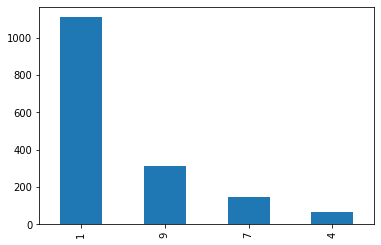

In [ ]:
race_cols = ['latino', 'race___1','race___2','race___3','race___4','race___5','race___6','race___7','race___8']
race_conditions = [data['race___1'] == 1,
                   data['race___4'] == 1,
                   data['latino'] == 1]

data['race'] = np.select(race_conditions, [1,4,9], default=7)
data["race"].value_counts().plot(kind='bar')

In [ ]:
raceMax = data.groupby(['record_id'])['race'].max()
raceMax = pd.DataFrame(raceMax)

raceMaxN=raceMax.groupby(by = 'race').size()
print(raceMaxN)
print(" ")
raceMaxN / uniquePatients

race
1    913
4     54
7    131
9    283
dtype: int64
 


race
1    0.661115
4    0.039102
7    0.094859
9    0.204924
dtype: float64

keep new race feature

In [ ]:
languageMax = demographics.groupby(['record_id'])['language'].max()
languageMax = pd.DataFrame(languageMax)

languageMaxN=languageMax.groupby(by = 'language').size()
print(languageMaxN)
print(" ")
languageMaxN / uniquePatients

language
1.0    1144
2.0     188
3.0       3
dtype: int64
 


language
1.0    0.828385
2.0    0.136133
3.0    0.002172
dtype: float64

language: 82% english, 14% spanish / other, 4% missing
keep language and group into english / not english / missing

other language had 2 additional patients. create new language feature that has english / not english and include the other language column

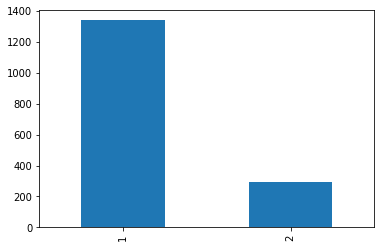

In [ ]:
lang_cols = ['language', 'other_language']
lang_conditions = [data['language'] == 1]

data['language'] = np.select(lang_conditions, [1], default=2)
data["language"].value_counts().plot(kind='bar')

In [ ]:
languageMax = data.groupby(['record_id'])['language'].max()
languageMax = pd.DataFrame(languageMax)

languageMaxN=languageMax.groupby(by = 'language').size()
print(languageMaxN)
print(" ")
languageMaxN / uniquePatients

language
1    1117
2     264
dtype: int64
 


language
1    0.808834
2    0.191166
dtype: float64

language --> combine language + other language columns and create new language column

**Original Values:**
- 1 = English
- 2 = Spanish
- 3 = Other
- Other language specified

**New Values:**
- 1 = English
- 2 = Non English

Non English is priotized by taking the max value. If patient had a non english language checked, that value was prioritized over all other patient records. 

keep language in features

In [ ]:
genderMax = data.groupby(['record_id'])['sex_gender'].max()
genderMax = pd.DataFrame(genderMax)

genderMaxN=genderMax.groupby(by = 'sex_gender').size()
print(genderMaxN)
print(" ")
genderMaxN / uniquePatients

sex_gender
1.0    643
2.0    695
3.0      2
dtype: int64
 


sex_gender
1.0    0.465605
2.0    0.503259
3.0    0.001448
dtype: float64

less than 4% missing -- keep gender in features

0.7400434467776972


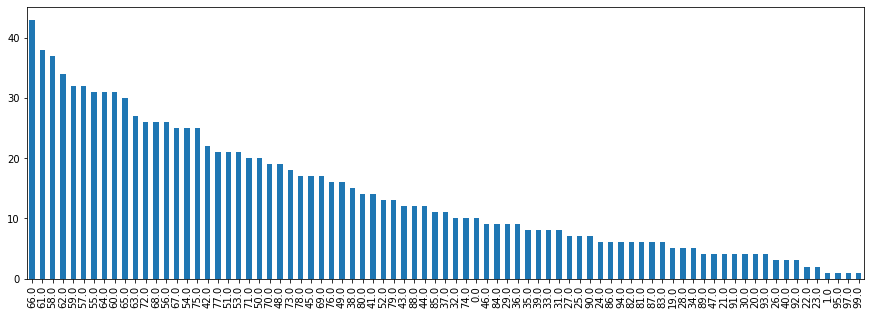

In [ ]:
ageMax = data.groupby(['record_id'])['age'].max()
ageMax = pd.DataFrame(ageMax)

ageMaxN=ageMax.groupby(by = 'age').size()
print(sum(ageMaxN / uniquePatients))

fig = plt.figure(figsize=(15,5))
data["age"].value_counts().plot(kind='bar')

74% of age is populated -- keep age in dataset

In [ ]:
unhousedMax = data.groupby(['record_id'])['unhoused'].max()
unhousedMax = pd.DataFrame(unhousedMax)

unhousedMaxN=unhousedMax.groupby(by = 'unhoused').size()
print(sum(unhousedMaxN / uniquePatients))
print(" ")
print(unhousedMaxN)
print(" ")
unhousedMaxN / uniquePatients

0.9594496741491673
 
unhoused
0.0    1277
1.0      33
2.0      15
dtype: int64
 


unhoused
0.0    0.924692
1.0    0.023896
2.0    0.010862
dtype: float64

95% of unhoused is populated but 92% of it means No.

removing this metric and will capture in housing and security

re-label health insurance based on prior work

**Original Values**

*   1 = Uninsured
*   2 = Medicaid
*   3 = Medicare
*   7 = Medicare & Medicaid
*   8 = Medicare & Private Insurance
*   4 = Other public insurance
*   5 = Private Insurance
*   6 = Not listed/not sure

**New Values**


*   1 = Uninsured
*   2 = Public
*   3 = Private
*   -1 = Not listed / NA

In [ ]:
medicare = data['health_insurance'] == 3
data.loc[medicare,'health_insurance'] = 2

medicaidMedicare = data['health_insurance'] == 7
data.loc[medicaidMedicare,'health_insurance'] = 2

medicarePrivate = data['health_insurance'] == 8
data.loc[medicarePrivate,'health_insurance'] = 3

otherPublic = data['health_insurance'] == 4
data.loc[otherPublic,'health_insurance'] = 2

private = data['health_insurance'] == 5
data.loc[private,'health_insurance'] = 3

notlistNA = data['health_insurance'] == 6
data.loc[notlistNA,'health_insurance'] = -1

In [ ]:
insMax = data.groupby(['record_id'])['health_insurance'].max()
insMax = pd.DataFrame(insMax)

insMaxN=insMax.groupby(by = 'health_insurance').size()
print(sum(insMaxN / uniquePatients))
print(" ")
print(insMaxN)
print(" ")
insMaxN / uniquePatients

0.2621288921071687
 
health_insurance
-1.0      4
 1.0     38
 2.0    265
 3.0     55
dtype: int64
 


health_insurance
-1.0    0.002896
 1.0    0.027516
 2.0    0.191890
 3.0    0.039826
dtype: float64

26% health insurance is specified - keep for now

In [ ]:
diabetesMax = data.groupby(['record_id'])['diabetes'].max()
diabetesMax = pd.DataFrame(diabetesMax)

diabetesMaxN=diabetesMax.groupby(by = 'diabetes').size()
print(sum(diabetesMaxN / uniquePatients))
print(" ")
print(diabetesMaxN)
print(" ")
diabetesMaxN / uniquePatients

0.6466328747284575
 
diabetes
0.0    494
1.0    399
dtype: int64
 


diabetes
0.0    0.357712
1.0    0.288921
dtype: float64

65% diabetes yes or no specified with a 36%/29% split - keep

In [ ]:
hypertensionMax = data.groupby(['record_id'])['hypertension'].max()
hypertensionMax = pd.DataFrame(hypertensionMax)

hypertensionMaxN=hypertensionMax.groupby(by = 'hypertension').size()
print(sum(hypertensionMaxN / uniquePatients))
print(" ")
print(hypertensionMaxN)
print(" ")
hypertensionMaxN / uniquePatients

0.6393917451122375
 
hypertension
0.0    455
1.0    428
dtype: int64
 


hypertension
0.0    0.329471
1.0    0.309920
dtype: float64

64% hypertension yes or no specified with 33% / 31% split -- keep

In [ ]:
asthmaMax = data.groupby(['record_id'])['asthma'].max()
asthmaMax = pd.DataFrame(asthmaMax)

asthmaMaxN=asthmaMax.groupby(by = 'asthma').size()
print(sum(asthmaMaxN / uniquePatients))
print(" ")
print(asthmaMaxN)
print(" ")
asthmaMaxN / uniquePatients

0.5836350470673426
 
asthma
0.0    708
1.0     98
dtype: int64
 


asthma
0.0    0.512672
1.0    0.070963
dtype: float64

59% asthma yes or no specified with 51% / 7% split -- keep

Create new feature that checks if a patient has at least one comorbidity -- the more co-morbidities, the greater the risk? Combine Diabetes, Asthma, Hypertension

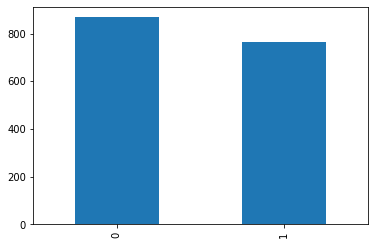

In [ ]:
comorbidity_cols = ['diabetes', 'asthma','hypertension']
comorbidity_conditions = [data['diabetes'] == 1,
                   data['asthma'] == 1,
                   data['hypertension'] == 1]

data['comorbidity'] = np.select(comorbidity_conditions, [1,1,1], default=0)
data["comorbidity"].value_counts().plot(kind='bar')

In [ ]:
comorbidityMax = data.groupby(['record_id'])['comorbidity'].max()
comorbidityMax = pd.DataFrame(comorbidityMax)

comorbidityMaxN=comorbidityMax.groupby(by = 'comorbidity').size()
print(comorbidityMaxN)
print(" ")
comorbidityMaxN / uniquePatients

comorbidity
0    701
1    680
dtype: int64
 


comorbidity
0    0.507603
1    0.492397
dtype: float64

About half of the patients had at least one comorbidity. Keep as feature.

Create feature that counts how many comorbidities a patient has based on asthma, hypertension, diabetes -- 1, 2 or all 3

In [ ]:
asthmaMax
diabetesMax
hypertensionMax

asthmaDiabetes = pd.merge(asthmaMax,diabetesMax,how='outer', on='record_id')
comorbiditiesCount = pd.merge(asthmaDiabetes,hypertensionMax,how='outer', on='record_id')

comorbiditiesCount['sumComorbidities'] = comorbiditiesCount.sum(axis = 1)
comorbiditiesCount

comorbidityCountN=comorbiditiesCount.groupby(by = 'sumComorbidities').size()
print(comorbidityCountN)
print(" ")
comorbidityCountN / uniquePatients

sumComorbidities
0.0    701
1.0    456
2.0    203
3.0     21
dtype: int64
 


sumComorbidities
0.0    0.507603
1.0    0.330196
2.0    0.146995
3.0    0.015206
dtype: float64

word cloud of major terms -- frequency counts
**text analysis for later**

In [ ]:
diagnosisNotes = tracking = data[['diagnoses_other']]
diagnosisNotes = diagnosisNotes.dropna()

remove demographics_and_contact_information_complete since it's informational

### Demographics and Contact Metric Summary

**Metrics to Keep:**


*   type_sw_referral
*   new race metric
*   new language metric
*   gender
*   age
*   new health insurance metric
*   hypertension
*   asthma
*   diabetes
*   comorbidities
*   count of comorbidities

**Metrics to Remove**

*   other_sw_referral
*   unhoused
*   demographics_and_contact_information_complete





# Contact Log

attempt contact 1 - 10 is a yes / no - aggregate all of these to see how many attempts were made by patient

**Do we treat null and zero the same or differently?**
create -1 or 9 for null

In [ ]:
contact1sum = data.groupby(['record_id'])['attempt_contact1'].sum()
contact1sum = pd.DataFrame(contact1sum)

contact2sum = data.groupby(['record_id'])['attempt_contact2'].sum()
contact2sum = pd.DataFrame(contact2sum)

contact3sum = data.groupby(['record_id'])['attempt_contact3'].sum()
contact3sum = pd.DataFrame(contact3sum)

contact4sum = data.groupby(['record_id'])['attempt_contact4'].sum()
contact4sum = pd.DataFrame(contact4sum)

contact5sum = data.groupby(['record_id'])['attempt_contact5'].sum()
contact5sum = pd.DataFrame(contact5sum)

contact6sum = data.groupby(['record_id'])['attempt_contact6'].sum()
contact6sum = pd.DataFrame(contact6sum)

contact7sum = data.groupby(['record_id'])['attempt_contact7'].sum()
contact7sum = pd.DataFrame(contact7sum)

contact8sum = data.groupby(['record_id'])['attempt_contact8'].sum()
contact8sum = pd.DataFrame(contact8sum)

contact9sum = data.groupby(['record_id'])['attempt_contact9'].sum()
contact9sum = pd.DataFrame(contact9sum)

contact10sum = data.groupby(['record_id'])['attempt_contact10'].sum()
contact10sum = pd.DataFrame(contact10sum)

contact1_2 = pd.merge(contact1sum,contact2sum,how='outer', on='record_id')
contact2_3 = pd.merge(contact1_2,contact3sum,how='outer', on='record_id')
contact3_4 = pd.merge(contact2_3,contact4sum,how='outer', on='record_id')
contact4_5 = pd.merge(contact3_4,contact5sum,how='outer', on='record_id')
contact5_6 = pd.merge(contact4_5,contact6sum,how='outer', on='record_id')
contact6_7 = pd.merge(contact5_6,contact7sum,how='outer', on='record_id')
contact7_8 = pd.merge(contact6_7,contact8sum,how='outer', on='record_id')
contact8_9 = pd.merge(contact7_8,contact9sum,how='outer', on='record_id')
contactSum = pd.merge(contact8_9,contact10sum,how='outer', on='record_id')

contactSum['sumContacts'] = contactSum.sum(axis = 1)

contactCountN=contactSum.groupby(by = 'sumContacts').size()
print(contactCountN)
print(" ")
contactCountN / uniquePatients



sumContacts
0.0     661
1.0     158
2.0     135
3.0     183
4.0      79
5.0      58
6.0      45
7.0      19
8.0      15
9.0       9
10.0     11
11.0      2
12.0      1
13.0      4
17.0      1
dtype: int64
 


sumContacts
0.0     0.478639
1.0     0.114410
2.0     0.097755
3.0     0.132513
4.0     0.057205
5.0     0.041999
6.0     0.032585
7.0     0.013758
8.0     0.010862
9.0     0.006517
10.0    0.007965
11.0    0.001448
12.0    0.000724
13.0    0.002896
17.0    0.000724
dtype: float64

create value = no call, 1 call, 2 calls, 3 calls, 4+ calls

In [ ]:
greater3 = contactSum['sumContacts'] >3
contactSum.loc[greater3,'sumContacts'] = '4+'

call3 = contactSum['sumContacts'] == 3
contactSum.loc[call3,'sumContacts'] = '3 calls'

call2 = contactSum['sumContacts'] == 2
contactSum.loc[call2,'sumContacts'] = '2 calls'

call1 = contactSum['sumContacts'] == 1
contactSum.loc[call1,'sumContacts'] = '1 call'

nocall = contactSum['sumContacts'] == 0
contactSum.loc[nocall,'sumContacts'] = 'no calls'



In [ ]:
groupContactAttempts = contactSum.groupby(['record_id'])['sumContacts'].sum()
groupContactAttempts = pd.DataFrame(groupContactAttempts)

groupContactAttemptsN = groupContactAttempts.groupby(by = 'sumContacts').size()
print(groupContactAttemptsN)
print(" ")
groupContactAttemptsN / uniquePatients

sumContacts
1 call      158
2 calls     135
3 calls     183
4+          244
no calls    661
dtype: int64
 


sumContacts
1 call      0.114410
2 calls     0.097755
3 calls     0.132513
4+          0.176684
no calls    0.478639
dtype: float64

remove date_contact_x -- informational

remove time_contact_x -- informational

**type_contact_x - is it important to know or can we remove?**

outcome_contactx is important - create a variable that checks if 'spoke with patient' OR 'spoke with someone else'

In [ ]:
outcome_contact_cols = ['outcome_contact1', 'outcome_contact2','outcome_contact3','outcome_contact4','outcome_contact5','outcome_contact6','outcome_contact7','outcome_contact8','outcome_contact9', 'outcome_contact10']
outcome_contact_conditions = [data['outcome_contact1'] == 6,
                   data['outcome_contact2'] == 6,
                   data['outcome_contact3'] == 6,
                   data['outcome_contact4'] == 6,
                   data['outcome_contact5'] == 6,
                   data['outcome_contact6'] == 6,
                   data['outcome_contact7'] == 6,
                   data['outcome_contact8'] == 6,
                   data['outcome_contact9'] == 6,
                   data['outcome_contact10'] == 6,
                   data['outcome_contact1'] == 3,
                   data['outcome_contact2'] == 3,
                   data['outcome_contact3'] == 3,
                   data['outcome_contact4'] == 3,
                   data['outcome_contact5'] == 3,
                   data['outcome_contact6'] == 3,
                   data['outcome_contact7'] == 3,
                   data['outcome_contact8'] == 3,
                   data['outcome_contact9'] == 3,
                   data['outcome_contact10'] == 3,
                   ]

data['spoke_patient'] = np.select(outcome_contact_conditions, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], default=0)

In [ ]:
spokePatientYN = data.groupby(['record_id'])['spoke_patient'].max()
spokePatientYN = pd.DataFrame(spokePatientYN)

spokePatientYN_N = spokePatientYN.groupby(by = 'spoke_patient').size()
print(spokePatientYN_N)
print(" ")
spokePatientYN_N / uniquePatients

spoke_patient
0    853
1    528
dtype: int64
 


spoke_patient
0    0.617668
1    0.382332
dtype: float64

**How do we handle patients that did not have any contact attempts but spoke with patient? Use OR to check contact attempts > 1 OR spoke with patient?**

Don't need individual lengths of each attempt. Can use sum_contact_attempts_calc to look at sum of all contacts by patient.

sum_contact_attempts_calc
0.0      868
1.0       14
2.0       27
3.0       30
4.0       22
        ... 
124.0      1
126.0      1
151.0      1
190.0      1
197.0      1
Length: 71, dtype: int64
 


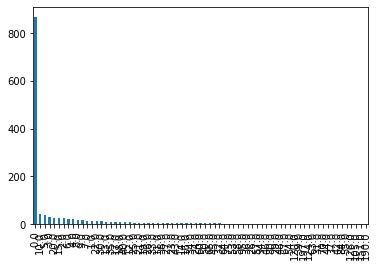

In [ ]:
sumContactLength = data.groupby(['record_id'])['sum_contact_attempts_calc'].sum()
sumContactLength = pd.DataFrame(sumContactLength)

sumContactLengthN = sumContactLength.groupby(by = 'sum_contact_attempts_calc').size()
print(sumContactLengthN)
print(" ")
sumContactLengthN / uniquePatients

sumContactLength["sum_contact_attempts_calc"].value_counts().plot(kind='bar')